In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import regex
import seaborn as sns
import numpy as np

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
df_starbucks = pd.read_csv('directory.csv')
df_starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [4]:
df_starbucks = df_starbucks[(df_starbucks['Brand'] == 'Starbucks')]
df_starbucks = df_starbucks[df_starbucks['Country'] == 'US'].reset_index(drop=True)
df_starbucks.shape

(13311, 13)

In [5]:
df_cityre = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df_cityre.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,195870.0,195305.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186516.0,186493.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94293.0,94409.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,132510.0,132361.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94895.0,94862.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0


In [6]:
df_city50 = df_cityre[0:50]
df_city50.shape

(50, 301)

In [7]:
top50_rev = df_city50[['RegionName', 'StateName', '2017-01-31']]
top50_rev = top50_rev.rename(columns={"RegionName": "City", "StateName": "State", "2017-01-31": "RE_Value"})
top50_rev.head()

,City,State,RE_Value
0,New York,NY,584490.0
1,Los Angeles,CA,636974.0
2,Houston,TX,170083.0
3,Chicago,IL,233162.0
4,San Antonio,TX,161663.0


In [49]:
mask = list(df_city50['RegionName'])
top50_star = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
top50_star_count = top50_star['City'].value_counts().rename_axis('City').reset_index(name = 'NumStarbucks')
top50_star_count.tail()

,City,NumStarbucks
45,El Paso,21
46,Milwaukee,21
47,Cleveland,19
48,Oklahoma City,15
49,Detroit,10


In [9]:
rev_star = top50_star_count.merge(top50_rev, left_on = 'City', right_on = 'City')
#.drop('RegionName', inplace = True, axis = 1)
rev_star.head()

,City,NumStarbucks,State,RE_Value
0,New York,230,NY,584490.0
1,Chicago,179,IL,233162.0
2,Las Vegas,153,NV,217354.0
3,Houston,151,TX,170083.0
4,Seattle,151,WA,637004.0


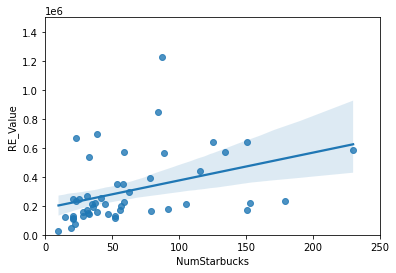

In [10]:
h = sns.regplot(data = rev_star, x = 'NumStarbucks', y = 'RE_Value')
h.set(xlim = (0, 250), ylim = (0, 1500000))
plt.show()

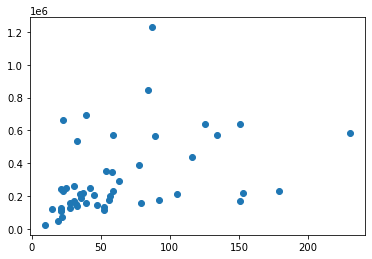

In [11]:
x, y = rev_star['NumStarbucks'], rev_star['RE_Value']

plt.clf()
plt.scatter(x, y)
plt.show()

In [12]:
#!conda install xlrd
#pop_df = pd.read_excel('SUB-IP-EST2019-ANNRES.xlsx')
#pop_df.head()

df_population = pd.read_csv('sub-est2019_all.csv', encoding = 'cp1252')
df_population.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


In [13]:
df_cities = df_population[(df_population['SUMLEV']== 162)]
df_cities_200 = df_cities.sort_values('POPESTIMATE2017', ascending = False)[0:200]
df_cities_200.shape

(200, 22)

In [14]:
df_cities_features = df_cities_200[['NAME', 'POPESTIMATE2017', 'STNAME']]
df_cities_features['City'] = df_cities_features['NAME'].str.split(pat = ' town$| city$').str[0]
df_cities_features = df_cities_features.drop(['NAME'], axis = 1)
df_cities_features = df_cities_features.rename(columns = {'POPESTIMATE2017': '2017_Population', 'STNAME':'State'})
df_cities_features.head()

C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2017_Population,State,City
46586,8437478,New York,New York
3092,3975788,California,Los Angeles
8173,2711069,Illinois,Chicago
71676,2316750,Texas,Houston
1512,1633560,Arizona,Phoenix


In [15]:
df_cities_features['State'].replace(us_state_abbrev, inplace = True)
#mask_state = list(df_city50['StateName'])
 
df_select_cities = df_cities_features[df_cities_features['City'].str.lower().isin([x.lower() for x in mask])]
df_select_cities = df_select_cities.reset_index(drop = True)
df_select_cities.head()

,2017_Population,State,City
0,8437478,NY,New York
1,3975788,CA,Los Angeles
2,2711069,IL,Chicago
3,2316750,TX,Houston
4,1633560,AZ,Phoenix


In [17]:
final_df = rev_star.merge(df_select_cities, left_on = 'City', right_on = 'City')
final_df.head()

,City,NumStarbucks,State_x,RE_Value,2017_Population,State_y
0,New York,230,NY,584490.0,8437478,NY
1,Chicago,179,IL,233162.0,2711069,IL
2,Las Vegas,153,NV,217354.0,635262,NV
3,Houston,151,TX,170083.0,2316750,TX
4,Seattle,151,WA,637004.0,728661,WA


In [18]:
final_df = final_df[final_df['State_x'] == final_df['State_y']]
final_df['Starbucks_percap'] = final_df['NumStarbucks'] / final_df['2017_Population']
final_df.head()

,City,NumStarbucks,State_x,RE_Value,2017_Population,State_y,Starbucks_percap
0,New York,230,NY,584490.0,8437478,NY,0.000027
1,Chicago,179,IL,233162.0,2711069,IL,0.000066
2,Las Vegas,153,NV,217354.0,635262,NV,0.000241
3,Houston,151,TX,170083.0,2316750,TX,0.000065
4,Seattle,151,WA,637004.0,728661,WA,0.000207


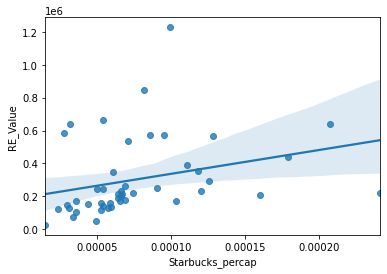

In [19]:
g = sns.regplot(x = 'Starbucks_percap', y = 'RE_Value', data = final_df)
plt.show()

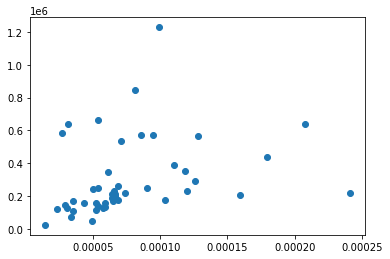

In [20]:
x, y = final_df['Starbucks_percap'], final_df['RE_Value']

plt.clf()
plt.scatter(x, y)

plt.show()

In [30]:
df_cityre_200 = df_cityre[0:200]
df_cityre_200.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,195870.0,195305.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186516.0,186493.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94293.0,94409.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,132510.0,132361.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94895.0,94862.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0


In [52]:
df_cityre_select = df_cityre_200.iloc[:, np.r_[0:7, range(-41,0)]]
df_cityre_select.drop('StateName', axis = 1, inplace = True)
df_cityre_select

,RegionID,SizeRank,RegionName,RegionType,State,Metro,2017-01-31,2017-02-28,2017-03-31,2017-04-30,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,New York-Newark-Jersey City,584490.0,587315.0,590243.0,592324.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,Los Angeles-Long Beach-Anaheim,636974.0,640135.0,643839.0,646233.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,Houston-The Woodlands-Sugar Land,170083.0,170522.0,171082.0,172015.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,Chicago-Naperville-Elgin,233162.0,234143.0,236057.0,237438.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,San Antonio-New Braunfels,161663.0,163379.0,164425.0,164774.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,19892,198,Pembroke Pines,City,FL,Miami-Fort Lauderdale-West Palm Beach,280375.0,281253.0,282129.0,284332.0,...,314541.0,315432.0,316833.0,317845.0,318370.0,319432.0,321174.0,322675.0,324781.0,326996.0
196,38328,199,Edmond,City,OK,Oklahoma City,229364.0,229443.0,229611.0,230416.0,...,240428.0,241167.0,241847.0,242504.0,242927.0,243685.0,244274.0,245456.0,246442.0,247444.0
197,25483,200,Lakeland,City,FL,Lakeland-Winter Haven,142468.0,143530.0,145193.0,146227.0,...,174614.0,175027.0,175633.0,176685.0,177823.0,178980.0,180308.0,181658.0,182756.0,182901.0
198,47250,201,Pueblo,City,CO,Pueblo,145398.0,146352.0,147400.0,148576.0,...,188072.0,189075.0,190146.0,191490.0,192590.0,193851.0,195460.0,197104.0,198807.0,200472.0


In [68]:
changes = df_cityre_select.iloc[:, 6:]
changes

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,584490.0,587315.0,590243.0,592324.0,595751.0,599203.0,603736.0,607641.0,611651.0,616185.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,636974.0,640135.0,643839.0,646233.0,651055.0,655208.0,660034.0,664198.0,668149.0,671498.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,170083.0,170522.0,171082.0,172015.0,172581.0,173043.0,173292.0,173521.0,173875.0,174318.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,233162.0,234143.0,236057.0,237438.0,238574.0,239067.0,239566.0,240505.0,241764.0,242599.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,161663.0,163379.0,164425.0,164774.0,164967.0,165565.0,166487.0,167557.0,168592.0,169684.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,280375.0,281253.0,282129.0,284332.0,285417.0,286406.0,287220.0,289041.0,290902.0,292527.0,...,314541.0,315432.0,316833.0,317845.0,318370.0,319432.0,321174.0,322675.0,324781.0,326996.0
196,229364.0,229443.0,229611.0,230416.0,231154.0,231890.0,231964.0,232287.0,232910.0,233598.0,...,240428.0,241167.0,241847.0,242504.0,242927.0,243685.0,244274.0,245456.0,246442.0,247444.0
197,142468.0,143530.0,145193.0,146227.0,147157.0,147941.0,148801.0,149871.0,151211.0,152767.0,...,174614.0,175027.0,175633.0,176685.0,177823.0,178980.0,180308.0,181658.0,182756.0,182901.0
198,145398.0,146352.0,147400.0,148576.0,149434.0,150986.0,152351.0,153936.0,154878.0,156233.0,...,188072.0,189075.0,190146.0,191490.0,192590.0,193851.0,195460.0,197104.0,198807.0,200472.0


In [69]:
changes_chart = changes.diff(axis = 1)
changes_chart

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,2825.0,2928.0,2081.0,3427.0,3452.0,4533.0,3905.0,4010.0,4534.0,...,-786.0,-1286.0,-1221.0,-1058.0,-241.0,254.0,9.0,-848.0,-140.0,-621.0
1,NaN,3161.0,3704.0,2394.0,4822.0,4153.0,4826.0,4164.0,3951.0,3349.0,...,2174.0,2593.0,3288.0,2378.0,3702.0,3481.0,5558.0,5051.0,3758.0,-84.0
2,NaN,439.0,560.0,933.0,566.0,462.0,249.0,229.0,354.0,443.0,...,599.0,402.0,598.0,447.0,519.0,154.0,471.0,887.0,1077.0,871.0
3,NaN,981.0,1914.0,1381.0,1136.0,493.0,499.0,939.0,1259.0,835.0,...,101.0,-226.0,-195.0,-187.0,-70.0,175.0,353.0,521.0,207.0,131.0
4,NaN,1716.0,1046.0,349.0,193.0,598.0,922.0,1070.0,1035.0,1092.0,...,593.0,918.0,626.0,716.0,111.0,459.0,57.0,459.0,24.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,878.0,876.0,2203.0,1085.0,989.0,814.0,1821.0,1861.0,1625.0,...,347.0,891.0,1401.0,1012.0,525.0,1062.0,1742.0,1501.0,2106.0,2215.0
196,NaN,79.0,168.0,805.0,738.0,736.0,74.0,323.0,623.0,688.0,...,916.0,739.0,680.0,657.0,423.0,758.0,589.0,1182.0,986.0,1002.0
197,NaN,1062.0,1663.0,1034.0,930.0,784.0,860.0,1070.0,1340.0,1556.0,...,534.0,413.0,606.0,1052.0,1138.0,1157.0,1328.0,1350.0,1098.0,145.0
198,NaN,954.0,1048.0,1176.0,858.0,1552.0,1365.0,1585.0,942.0,1355.0,...,910.0,1003.0,1071.0,1344.0,1100.0,1261.0,1609.0,1644.0,1703.0,1665.0


In [59]:
percentage_chart = (changes_chart.iloc[:, 1:] / changes) * 100
percentage_chart

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,0.481003,0.496067,0.351328,0.575240,0.576099,0.750825,0.642649,0.655603,0.735818,...,-0.119701,-0.196231,-0.186660,-0.162004,-0.036916,0.038892,0.001378,-0.130012,-0.021469,-0.095321
1,NaN,0.493802,0.575299,0.370455,0.740644,0.633845,0.731174,0.626921,0.591335,0.498736,...,0.300781,0.357469,0.451236,0.325288,0.503848,0.471535,0.747259,0.674514,0.499340,-0.011163
2,NaN,0.257445,0.327328,0.542395,0.327962,0.266986,0.143688,0.131972,0.203595,0.254133,...,0.315625,0.211374,0.313447,0.233751,0.270668,0.080249,0.244837,0.458967,0.554192,0.446191
3,NaN,0.418975,0.810821,0.581626,0.476163,0.206218,0.208293,0.390428,0.520756,0.344189,...,0.040117,-0.089847,-0.077583,-0.074456,-0.027879,0.069649,0.140294,0.206635,0.082032,0.051887
4,NaN,1.050319,0.636156,0.211805,0.116993,0.361187,0.553797,0.638589,0.613908,0.643549,...,0.319258,0.491801,0.334246,0.380845,0.059007,0.243407,0.030218,0.242743,0.012691,0.070279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,0.312174,0.310496,0.774798,0.380146,0.345314,0.283406,0.630014,0.639734,0.555504,...,0.110319,0.282470,0.442189,0.318394,0.164902,0.332465,0.542385,0.465174,0.648437,0.677378
196,NaN,0.034431,0.073167,0.349368,0.319268,0.317392,0.031902,0.139052,0.267485,0.294523,...,0.380987,0.306427,0.281169,0.270923,0.174126,0.311057,0.241123,0.481553,0.400094,0.404940
197,NaN,0.739915,1.145372,0.707120,0.631978,0.529941,0.577953,0.713947,0.886179,1.018545,...,0.305817,0.235964,0.345038,0.595410,0.639962,0.646441,0.736518,0.743155,0.600801,0.079278
198,NaN,0.651853,0.710991,0.791514,0.574167,1.027910,0.895957,1.029649,0.608221,0.867294,...,0.483857,0.530477,0.563251,0.701864,0.571162,0.650500,0.823186,0.834077,0.856610,0.830540


In [102]:
annual_chart = changes.iloc[:, ::12]
annual_percent = annual_chart.diff(axis = 1)
#annual_percent = annual_percent / changes
#annual_percent = annual_percent.drop('2017-01-31', axis = 1)
annual_percent = (annual_percent / changes.iloc[:, ::12]) * 100
annual_percent

,2017-01-31,2018-01-31,2019-01-31,2020-01-31
0,NaN,6.470376,5.041893,-0.768813
1,NaN,7.426392,4.206263,2.701202
2,NaN,3.325679,5.619870,2.861877
3,NaN,5.164728,2.131640,0.018308
4,NaN,5.454705,5.270273,4.279510
...,...,...,...,...
195,NaN,5.282236,5.294057,2.151945
196,NaN,2.270209,0.338445,3.363358
197,NaN,8.770851,8.322669,4.826238
198,NaN,9.209664,10.970586,7.206566


In [ ]:
#insert RegionName, State
changes_merge = 

In [108]:
mask = list(df_cityre['RegionName'])
top200_star = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
top200_star_count = top200_star['City'].value_counts().rename_axis('City').reset_index(name = 'NumStarbucks')
top200_star_count.tail

<bound method NDFrame.tail of               City  NumStarbucks
0         New York           230
1          Chicago           179
2        Las Vegas           153
3          Houston           151
4          Seattle           151
...            ...           ...
2667       Walpole             1
2668  Mount Pocono             1
2669       Dunedin             1
2670  Valley Grove             1
2671       Muskego             1

[2672 rows x 2 columns]>

In [110]:
top200_star_count.shape, df_cityre.shape

((2672, 2), (26705, 301))